In [25]:
from music21 import *
import glob
import numpy as np
from datetime import datetime
import os

In [32]:
path = '/home/eurismar/notebooks/c-rnn-gan/datadir/classical'

In [59]:
files = []
for name in listdir:
    path_complete = os.path.join(path, name)
    files.extend(glob.glob('{}/*.mid*'.format(path_complete)))
    

In [60]:
len(files)

2831

In [61]:
#path = '/home/eurismar/notebooks/Music_Generator_Demo/Pop_Music_Midi/'
#path = '/home/eurismar/Downloads/midi/Harpa.Crista.em.Arquivo.MIDI'
#path = '/home/eurismar/notebooks/c-rnn-gan/datadir/classical/chopin'

In [62]:
file = files[0]

In [63]:
#file ='/home/eurismar/Downloads/midi/Harpa.Crista.em.Arquivo.MIDI/001.MID'

In [64]:
file

'/home/eurismar/notebooks/c-rnn-gan/datadir/classical/mahler/1396mahler55.mid'

In [65]:
midi_stream = converter.parse(file)

In [66]:
midi_stream.show('text')

{0.0} <music21.stream.Part 0x7f1297fbeac8>
    {0.0} <music21.instrument.StringInstrument StringInstrument>
    {0.0} <music21.tempo.MetronomeMark andante Quarter=73.0>
    {0.0} <music21.meter.TimeSignature 2/4>
    {0.0} <music21.stream.Voice 0x7f1297fbefd0>
        {0.0} <music21.note.Rest rest>
        {6.0} <music21.note.Note A>
        {146.0} <music21.note.Note F#>
        {146.5} <music21.note.Note E>
        {147.0} <music21.note.Note D>
        {147.5} <music21.note.Note A>
        {148.0} <music21.note.Note B>
        {148.75} <music21.note.Note A>
        {149.0} <music21.note.Note B>
        {149.25} <music21.note.Note F#>
        {149.5} <music21.note.Note B>
        {149.75} <music21.note.Note C#>
        {150.0} <music21.note.Note D>
        {150.5} <music21.note.Note B>
        {151.0} <music21.note.Note A>
        {151.5} <music21.note.Note F#>
        {152.0} <music21.note.Note A>
        {152.5} <music21.note.Note G>
        {152.75} <music21.note.Note F#>
        {

In [67]:
part0 = midi_stream[0]

In [68]:
key_sig = part0.keySignature

In [69]:
print(key_sig)

None


In [70]:
KEY_SIG_OFFSET = 0

In [73]:
if key_sig != None:
    midi_stream.transpose(KEY_SIG_OFFSET - key_sig.tonic.pitchClass, inPlace=True)

In [74]:
melody_corpus = []
for m in part0.measures(1, None):
    m.show('text')
    if hasattr(m, 'flat'):
        for nr in m.flat.notesAndRests:
            pitch = nr.pitch.midi  if isinstance(nr, note.Note) else 0
            duration = float(nr.quarterLength)
            note_repr = (pitch, duration)
            melody_corpus.append(note_repr)

meter.py: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[None, None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter.py: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter.py: WARNING: Found a messed up beam 

<music21.instrument.StringInstrument StringInstrument>
{0.0} <music21.clef.TrebleClef>
{0.0} <music21.meter.TimeSignature 2/4>
{0.0} <music21.stream.Voice 0>
    {0.0} <music21.note.Rest rest>
{0.0} <music21.stream.Voice 1>
    {0.0} <music21.note.Rest rest>
{0.0} <music21.stream.Voice 2>

{0.0} <music21.meter.TimeSignature 4/4>
{0.0} <music21.stream.Voice 0>
    {0.0} <music21.note.Rest rest>
{0.0} <music21.stream.Voice 1>
    {0.0} <music21.note.Rest rest>
{0.0} <music21.stream.Voice 2>

{0.0} <music21.stream.Voice 0>
    {0.0} <music21.note.Note A>
{0.0} <music21.stream.Voice 1>
    {0.0} <music21.note.Rest rest>
{0.0} <music21.stream.Voice 2>

{0.0} <music21.stream.Voice 0>

{0.0} <music21.stream.Voice 1>
    {0.0} <music21.note.Rest rest>
{0.0} <music21.stream.Voice 2>

{0.0} <music21.stream.Voice 0>

{0.0} <music21.stream.Voice 1>
    {0.0} <music21.note.Rest rest>
{0.0} <music21.stream.Voice 2>

{0.0} <music21.stream.Voice 0>

{0.0} <music21.stream.Voice 1>
    {0.0} <music21.no


{0.0} <music21.stream.Voice 0>
    {0.0} <music21.note.Note B->
    {0.5} <music21.note.Note B>
    {1.0} <music21.note.Note C#>
    {1.5} <music21.note.Note E->
    {2.0} <music21.note.Note E->
    {2.5} <music21.note.Note E>
    {3.0} <music21.note.Note G>
    {3.5} <music21.note.Note G#>
{0.0} <music21.stream.Voice 1>
    {0.0} <music21.note.Rest rest>
    {3.75} <music21.note.Note B>
{0.0} <music21.stream.Voice 2>

{0.0} <music21.stream.Voice 0>
    {0.0} <music21.note.Note E>
{0.0} <music21.stream.Voice 1>
    {0.0} <music21.note.Note C#>
    {0.0} <music21.note.Rest rest>
{0.0} <music21.stream.Voice 2>

{0.0} <music21.stream.Voice 0>
    {2.0} <music21.chord.Chord E-7 B-6 F#6 E-6>
{0.0} <music21.stream.Voice 1>
    {0.0} <music21.note.Rest rest>
{0.0} <music21.stream.Voice 2>

{0.0} <music21.stream.Voice 0>
    {0.0} <music21.chord.Chord F#6 C#6 F#5>
    {2.0} <music21.note.Note E->
{0.0} <music21.stream.Voice 1>
    {0.0} <music21.note.Rest rest>
    {2.0} <music21.chord.Chord 


{0.0} <music21.stream.Voice 0>
    {0.0} <music21.note.Note A>
    {1.5} <music21.note.Note G>
    {2.25} <music21.note.Note F#>
    {2.5} <music21.note.Note E>
    {2.75} <music21.note.Note D>
    {3.0} <music21.note.Note C#>
    {3.25} <music21.note.Note D>
    {3.5} <music21.note.Note E>
    {3.75} <music21.note.Note D>
{0.0} <music21.stream.Voice 1>
    {0.0} <music21.note.Note A>
    {0.0} <music21.note.Rest rest>
{0.0} <music21.stream.Voice 2>

{0.0} <music21.stream.Voice 0>
    {0.0} <music21.note.Note E>
    {3.5} <music21.note.Note A>
{0.0} <music21.stream.Voice 1>
    {0.0} <music21.note.Rest rest>
{0.0} <music21.stream.Voice 2>

{0.0} <music21.stream.Voice 0>
    {0.0} <music21.note.Note B->
{0.0} <music21.stream.Voice 1>
    {0.0} <music21.note.Rest rest>
{0.0} <music21.stream.Voice 2>

{0.0} <music21.stream.Voice 0>
    {3.75} <music21.note.Note D>
{0.0} <music21.stream.Voice 1>
    {0.0} <music21.note.Rest rest>
{0.0} <music21.stream.Voice 2>

{0.0} <music21.stream.Voice

{0.0} <music21.stream.Voice 0>
    {0.0} <music21.note.Note A>
    {0.25} <music21.note.Note G#>
    {0.5} <music21.note.Note F#>
    {0.75} <music21.note.Note E>
    {1.0} <music21.note.Note D>
    {1.25} <music21.note.Note C#>
    {1.5} <music21.note.Note B>
    {1.75} <music21.note.Note E>
    {2.0} <music21.note.Note A>
    {2.25} <music21.note.Note G#>
    {2.5} <music21.note.Note F#>
    {2.75} <music21.note.Note E>
    {3.0} <music21.note.Note D>
    {3.25} <music21.note.Note C#>
    {3.5} <music21.note.Note B>
    {3.75} <music21.note.Note A>
{0.0} <music21.stream.Voice 1>
    {0.0} <music21.note.Rest rest>
{0.0} <music21.stream.Voice 2>

{0.0} <music21.stream.Voice 0>
    {0.0} <music21.note.Note D>
    {0.25} <music21.note.Note C#>
    {0.5} <music21.note.Note B>
    {0.75} <music21.note.Note A>
    {1.0} <music21.note.Note G#>
    {1.25} <music21.note.Note F#>
    {1.5} <music21.note.Note E>
    {1.75} <music21.note.Note D>
{0.0} <music21.stream.Voice 1>
    {0.0} <music21.n

In [79]:
melody_corpus

[(0, 2.0),
 (0, 2.0),
 (0, 4.0),
 (0, 4.0),
 (57, 2.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (0, 4.0),
 (66, 0.25),
 (0, 4.0),
 (64, 0.25),
 (62, 0.25),
 (69, 0.25),
 (71, 0.75),
 (69, 0.25),
 (71, 0.25),
 (66, 0.25),
 (71, 0.25),
 (73, 0.25),
 (74, 0.25),
 (0, 4.0),
 (71, 0.25),
 (69, 0.25),
 (66, 0.25),
 (69, 0.25),
 (67, 0.25),
 (66, 0.25),
 (64, 1.0),
 (64, 0.25),
 (76, 0.25),
 (0, 4.0),
 (73, 0.25),
 (69, 0.25),
 (74, 0.25),
 (73, 0.25),
 (69, 0.25),
 (67, 0.25),
 (66, 1.0),
 (66, 0.5),
 (0, 4.0),
 (68, 0.25),
 (69, 0.25),
 (71, 0.25),
 (64, 0.25),
 (76, 1.5),
 (81, 0.25),
 (76, 0.75),
 (0, 4.0),
 (74, 0.0),
 (73, 0.25),
 (74, 0.25),
 (76, 0.25),
 (

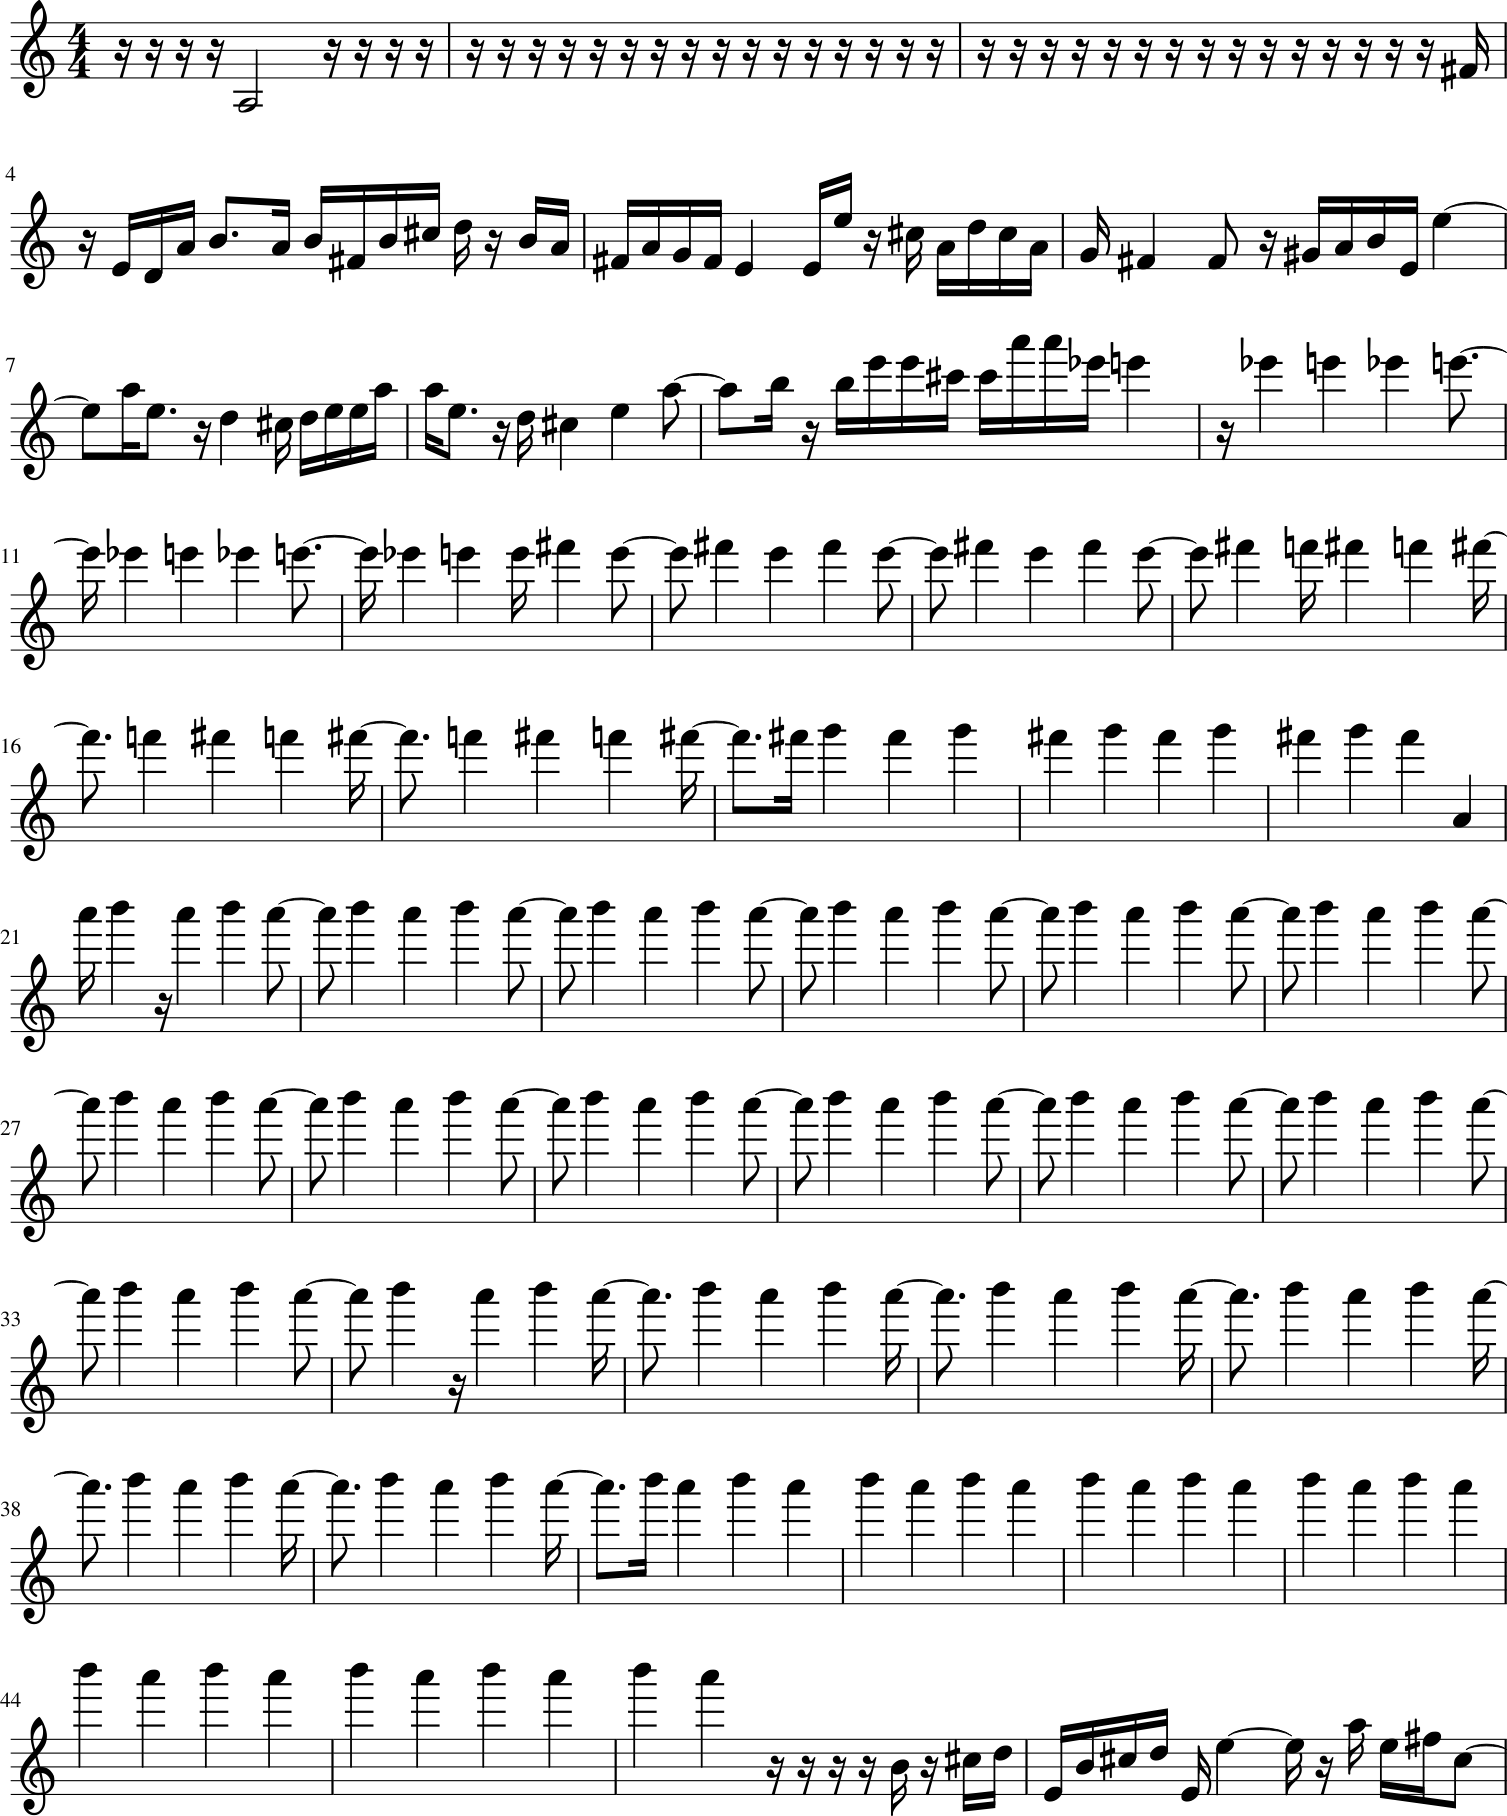

In [80]:
from music21 import *
sc = stream.Score()
ts = meter.TimeSignature('4/4')
sc.append(ts)
for t in melody_corpus:
    if t[0] == 0:
        r = note.Rest(quarterLength = 0.25)
        sc.append(r)
    else:
        n = note.Note(midi=t[0], quarterLength=t[1])
        sc.append(n)
sc.show()

In [81]:
filename='/home/eurismar/Downloads/midi/teste/teste.MID'
mf = midi.translate.streamToMidiFile(sc)
mf.open(filename, 'wb')
mf.write()
mf.close()